In [15]:
import boto3
import pandas as pd

s3_bucket = 'jokinatxatfm'
file_key='df_lesiones.xlsx'

s3 = boto3.client('s3')
s3.download_file(s3_bucket,file_key,file_key)

df_lesiones = pd.read_excel(file_key)

print(df_lesiones)

                            Injury       From         To           Teams  \
0            Lesión de pantorrilla 2015-04-08 2015-05-14  Rayo Vallecano   
1                 Rotura de fibras 2012-01-08 2012-02-05    RCD Espanyol   
2       Rotura del menisco externo 2021-10-30 2021-12-30     Hércules CF   
3               Menisco desgarrado 2021-03-07 2021-08-07     Hércules CF   
4     Rotura del ligamento cruzado 2011-07-17 2012-02-01       Girona FC   
...                            ...        ...        ...             ...   
6404          Problemas musculares 2018-04-02 2018-05-01    RCD Espanyol   
6405  Rotura del ligamento cruzado 2017-03-19 2017-11-09    RCD Espanyol   
6406             Lesión de tobillo 2016-09-26 2016-11-18    RCD Espanyol   
6407               Lesión de muslo 2016-04-18 2016-05-02    RCD Espanyol   
6408           Distensión de muslo 2016-01-11 2016-02-11    RCD Espanyol   

      NumberOfMatches            Player Fecha_Previa_Partido  \
0                   7  

In [23]:
df_muscular = df_lesiones[df_lesiones['Injury'] == 'Lesión muscular']

In [25]:
X = df_lesiones[['Minutos_Consecutivos', 'Partidos_Consecutivos_Enteros','Partidos_Consecutivos']]
y = df_lesiones['NumberOfMatches']
# Dividir datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Correlaciones

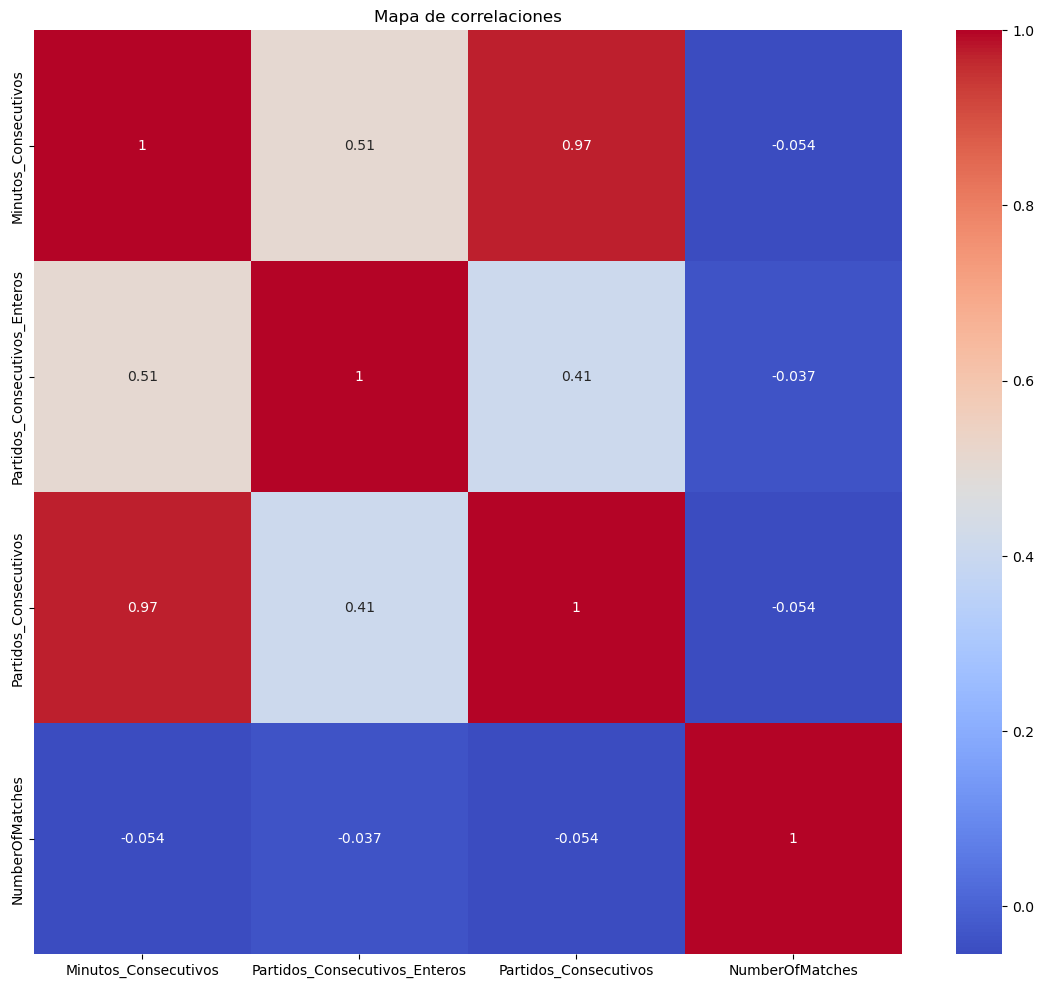

In [40]:
import seaborn as sns

#Correlaciones
correlation_matrix = df_lesiones[['Minutos_Consecutivos', 'Partidos_Consecutivos_Enteros','Partidos_Consecutivos','NumberOfMatches']].corr()
fig = plt.figure(figsize = (14,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de correlaciones')
plt.show()

# Regresion Logistica

In [26]:
# Ejecución del algoritmo de ML LinearRegression y generación de su modelo
# Nombre del modelo: "LinearRegressionA"
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Predicción sobre el conjunto de validación
y_pred_val = model.predict(X_val)
# Predicción sobre el conjunto de test
y_pred_LinearRegression = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Calcular el coeficiente de determinación R2
r2 = r2_score(y_val, y_pred_val)
print("Coeficiente de determinación (R2) en el conjunto de validación:", r2)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_val, y_pred_val)
print("Error cuadrático medio (MSE) en el conjunto de validación:", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_val, y_pred_val)
print("Error absoluto medio (MAE) en el conjunto de validación:", mae)


Coeficiente de determinación (R2) en el conjunto de validación: 0.0053319402751186296
Error cuadrático medio (MSE) en el conjunto de validación: 70.87195687827375
Error absoluto medio (MAE) en el conjunto de validación: 5.426410316853372


# Arbol de decision

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# Crear y entrenar el modelo de árbol de decisión
modelo = DecisionTreeRegressor()
modelo.fit(X_train, y_train)

# Predicciones conjunto de prueba
y_val_DecisionTree_A = modelo.predict(X_val)

# Calcular MAE
mae = mean_absolute_error(y_val, y_val_DecisionTree_A)

# Prediccion
y_pred_DecisionTree_A = modelo.predict(X_test)

In [32]:
# Calcular el coeficiente de determinación R2
r2 = r2_score(y_val, y_val_DecisionTree_A)
print("Coeficiente de determinación (R2) en el conjunto de validación:", r2)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_val, y_val_DecisionTree_A)
print("Error cuadrático medio (MSE) en el conjunto de validación:", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_val, y_val_DecisionTree_A)
print("Error absoluto medio (MAE) en el conjunto de validación:", mae)

Coeficiente de determinación (R2) en el conjunto de validación: -0.4070489055594415
Error cuadrático medio (MSE) en el conjunto de validación: 100.25486229849685
Error absoluto medio (MAE) en el conjunto de validación: 5.986084962701946


Hiperparametros

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definimos que hiperparametros hay
param_dist = {"max_features": [1.0, 'sqrt'], # Number of features to consider at every split (1.0 is the old 'auto')
              "max_depth": [16, 12,8,4, 2,None], # Maximum number of levels in tree
              "min_samples_split": randint(2, 50), #  Minimum number of samples required to split a node
              "min_samples_leaf": randint(1, 50), # Minimum number of samples required at each leaf node
              "criterion": ["squared_error", "absolute_error"]}

random_search = RandomizedSearchCV(modelo, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs = -1)
random_search.fit(X_train, y_train)

# Los mejores hiperparametros
mejores_hiperparametros = random_search.best_params_
modelo_bueno = random_search.best_estimator_

# Predicciones  conjunto de validacion
y_val_DecisionTree_B = modelo_bueno.predict(X_val)

In [35]:
# Calcular el coeficiente de determinación R2
r2 = r2_score(y_val, y_val_DecisionTree_B)
print("Coeficiente de determinación (R2) en el conjunto de validación:", r2)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_val, y_val_DecisionTree_B)
print("Error cuadrático medio (MSE) en el conjunto de validación:", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_val, y_val_DecisionTree_B)
print("Error absoluto medio (MAE) en el conjunto de validación:", mae)

Coeficiente de determinación (R2) en el conjunto de validación: -0.010751054098305124
Error cuadrático medio (MSE) en el conjunto de validación: 72.01790026367014
Error absoluto medio (MAE) en el conjunto de validación: 5.518939531888952


# Boosting

In [49]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Modelo base
modelo_base_adaboost = DecisionTreeRegressor(criterion='absolute_error')

# modelo adaboost
modelo_adaboost = AdaBoostRegressor(estimator=modelo_base_adaboost, random_state=42)

param_dist_adaboost = {
 "n_estimators": [8, 32, 64, 128],
 "learning_rate" : [0.01,0.05,0.1],
 "loss" : ['linear', 'square', 'exponential']
 }

# Busqueda con GridSearchCV
random_search_adaboost = GridSearchCV(modelo_adaboost, param_grid=param_dist_adaboost, cv=5, n_jobs=-1)
random_search_adaboost.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
mejores_hiperparametros_adaboost = random_search_adaboost.best_params_
print(mejores_hiperparametros_adaboost)
modelo_onena = random_search_adaboost.best_estimator_

# Predicciones en el conjunto de validacion
y_val_AdaBoost_B = modelo_onena.predict(X_val)

# Calcular el MAE
mae = mean_absolute_error(y_val, y_val_AdaBoost_B)
print(f'MAE del modelo en el conjunto de prueba: {mae:.2f}')

# Prediccion
y_pred_AdaBoost_B = modelo_onena.predict(X_test)

{'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 32}
MAE del modelo en el conjunto de prueba: 5.13


In [50]:
# Calcular el coeficiente de determinación R2
r2 = r2_score(y_val, y_val_AdaBoost_B)
print("Coeficiente de determinación (R2) en el conjunto de validación:", r2)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_val, y_val_AdaBoost_B)
print("Error cuadrático medio (MSE) en el conjunto de validación:", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_val, y_val_AdaBoost_B)
print("Error absoluto medio (MAE) en el conjunto de validación:", mae)

Coeficiente de determinación (R2) en el conjunto de validación: -0.28320202974970754
Error cuadrático medio (MSE) en el conjunto de validación: 91.43054110301769
Error absoluto medio (MAE) en el conjunto de validación: 5.134755463059313
